In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
x_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNearestNeighbour/xdata.csv").values
y_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNearestNeighbour/ydata.csv").values
x_data = x_data[:,1:]
y_data = y_data[:,1].reshape(-1,1)

In [4]:
x_data.shape,y_data.shape

((399, 2), (399, 1))

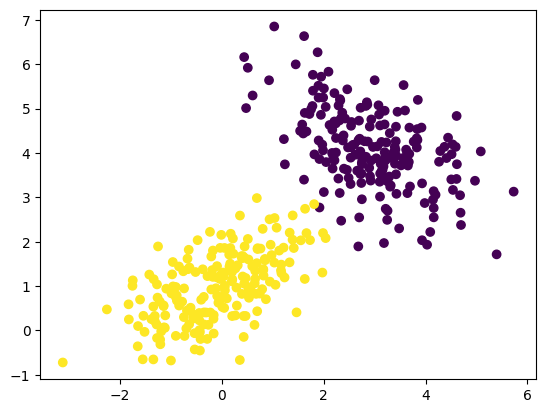

In [5]:
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [ ]:
class KNNClassifier:
  def __init__(self,k=5):
    self.k = k
  def fit(self,x,y):
    self.x = x
    self.y = y
  def distance_formula(self,p1,p2):
    return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
  def predict(self,p):
    distances = []
    for i in range(len(self.x)):
      distances.append((self.distance_formula(self.x[i],p),i))

    distances = sorted(distances, key=lambda x: x[0])
    points_with_distances = distances[:self.k]

    classes = []

    for dist,i in points_with_distances:
      classes.append(self.y[i])
    class_,counts = np.unique(classes,return_counts=True)

    ix = np.argmax(counts)

    pred = {"class":float(class_[ix]),"prob":float(max(counts)/np.sum(counts))}
    return pred

In [ ]:
knn_model = KNNClassifier()
knn_model.fit(x_data,y_data)

In [ ]:
knn_model.predict(x_data[0])

{'class': 0.0, 'prob': 1.0}

In [ ]:
x_train,y_train=x_data[:80],y_data[:80]
x_test,y_test = x_data[-20:],y_train[-20:]

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((80, 2), (80, 1), (20, 2), (20, 1))

In [ ]:
knn_model = KNNClassifier()

In [ ]:
knn_model.fit(x_train,y_train)

In [ ]:
knn_model.predict(x_test[15])

{'class': 0.0, 'prob': 1.0}

In [ ]:
predictions = []

for i in range(len(x_test)):
  predictions.append(knn_model.predict(x_test[i])["class"])

In [ ]:
np.mean(np.array(predictions) == y_test.reshape(-1))

np.float64(1.0)